<a href="https://colab.research.google.com/github/Mevaria/AAI614_Wehbe/blob/main/Notebook6.5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vanessa Wehbe

# AAI614: Data Science & its Applications

*Notebook 6.5: Experiment with PCA*


*Source: This notebook contains an amanded excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas*

In [1]:
from packaging import version
import sklearn
import matplotlib

assert version.parse(matplotlib.__version__) >= version.parse("3.7.3")

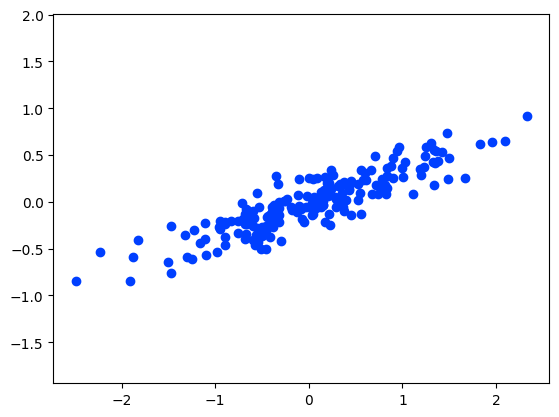

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-bright')

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
PCA(n_components=5)

PCA(n_components=5)

In [5]:
print(pca.components_)

[[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]


In [6]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


In [7]:
# Variance percentages using the existing 'pca'
total = pca.explained_variance_.sum()
for i, val in enumerate(pca.explained_variance_, start=1):
    print(f"PC{i}: {val} / {total} = {val/total*100:.1f}%")

PC1: 0.7625315008826108 / 0.7810093963961733 = 97.6%
PC2: 0.018477895513562492 / 0.7810093963961733 = 2.4%


In [8]:
ev = np.array([0.7625315, 0.0184779])  # from pca.explained_variance_
total = ev.sum()
ev_pct = ev / total * 100

print("Total variance:", total)
for i, p in enumerate(ev_pct, start=1):
    print(f"PC{i}: {ev[i-1]} / {total} = {p:.1f}%")


Total variance: 0.7810094000000001
PC1: 0.7625315 / 0.7810094000000001 = 97.6%
PC2: 0.0184779 / 0.7810094000000001 = 2.4%


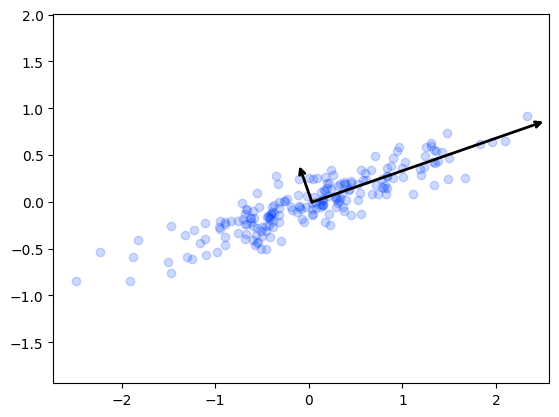

In [9]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [10]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape: ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:  (200, 2)
transformed shape: (200, 1)


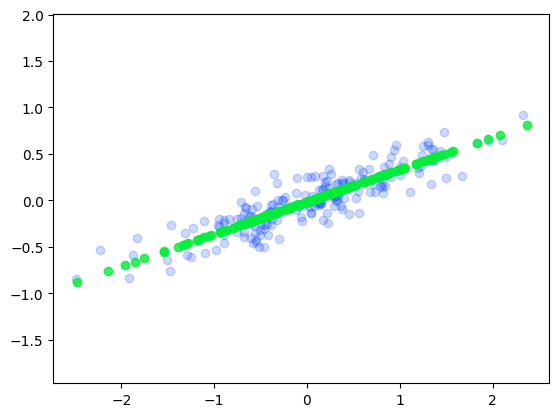

In [11]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [13]:
pca = PCA(2) # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


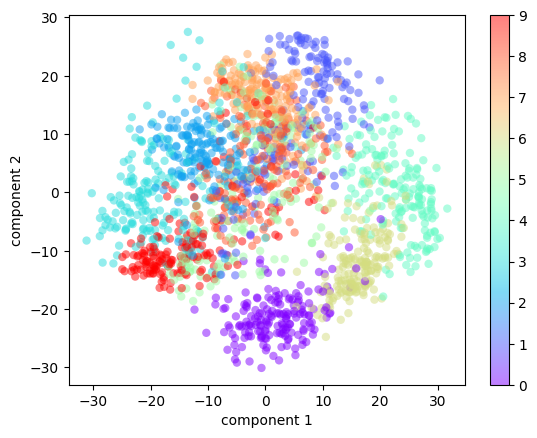

In [14]:
plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5, cmap=matplotlib.colormaps.get_cmap('rainbow'))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Components for 90%: 21, 95%: 29, 99%: 41


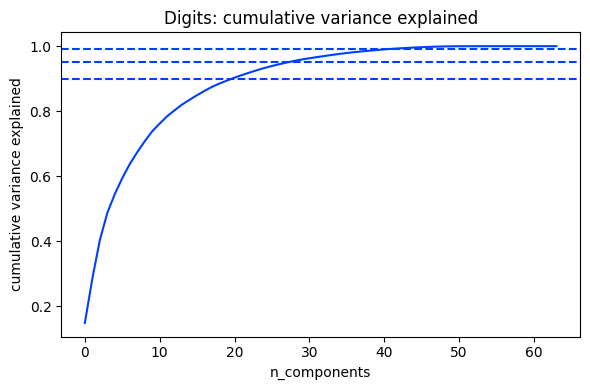

In [15]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Fit PCA on all 64 features to measure variance explained
pca_full = PCA(n_components=64, svd_solver="full", random_state=0).fit(digits.data)

cum = np.cumsum(pca_full.explained_variance_ratio_)
k90 = np.searchsorted(cum, 0.90) + 1
k95 = np.searchsorted(cum, 0.95) + 1
k99 = np.searchsorted(cum, 0.99) + 1
print(f"Components for 90%: {k90}, 95%: {k95}, 99%: {k99}")

plt.figure(figsize=(6,4))
plt.plot(cum)
plt.axhline(0.90, ls="--"); plt.axhline(0.95, ls="--"); plt.axhline(0.99, ls="--")
plt.xlabel("n_components"); plt.ylabel("cumulative variance explained")
plt.title("Digits: cumulative variance explained")
plt.tight_layout(); plt.show()


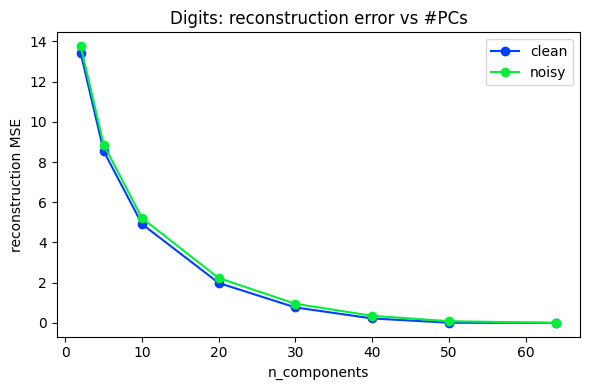

In [16]:
from sklearn.metrics import mean_squared_error

# Create a noisy version of the digits (additive Gaussian noise)
rng = np.random.default_rng(0)
X_noisy = digits.data + rng.normal(0, 0.6, size=digits.data.shape)

def reconstruction_mse(X, n):
    m = PCA(n_components=n, svd_solver="full", random_state=0).fit(X)
    X_rec = m.inverse_transform(m.transform(X))
    return mean_squared_error(X, X_rec)

n_list = [2, 5, 10, 20, 30, 40, 50, 64]
mse_clean = [reconstruction_mse(digits.data, n) for n in n_list]
mse_noisy = [reconstruction_mse(X_noisy, n) for n in n_list]

plt.figure(figsize=(6,4))
plt.plot(n_list, mse_clean, marker="o", label="clean")
plt.plot(n_list, mse_noisy, marker="o", label="noisy")
plt.xlabel("n_components"); plt.ylabel("reconstruction MSE")
plt.title("Digits: reconstruction error vs #PCs")
plt.legend(); plt.tight_layout(); plt.show()

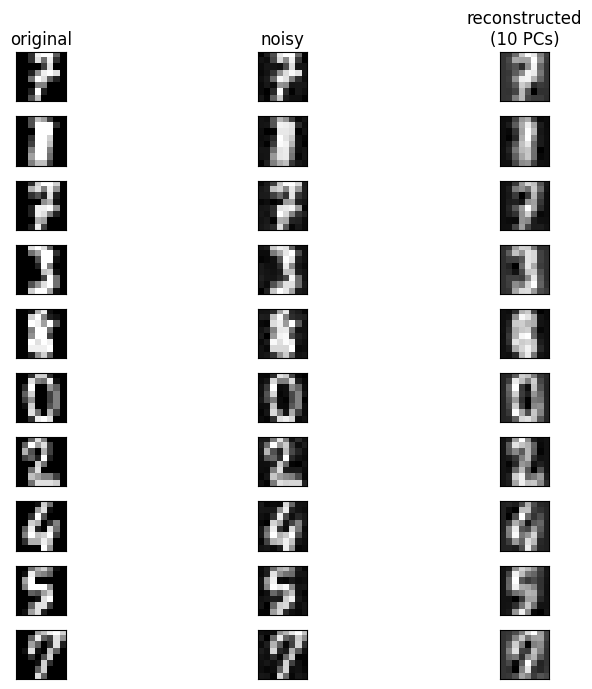

In [17]:
n_components_view = 10  # try 10, 20, 30

# Reconstruct from clean and noisy using the same number of PCs
p_view = PCA(n_components=n_components_view, svd_solver="full", random_state=0).fit(digits.data)
X_rec_clean = p_view.inverse_transform(p_view.transform(digits.data))

p_view_noisy = PCA(n_components=n_components_view, svd_solver="full", random_state=0).fit(X_noisy)
X_rec_noisy = p_view_noisy.inverse_transform(p_view_noisy.transform(X_noisy))

idx = np.random.default_rng(1).choice(len(digits.data), size=10, replace=False)

plt.figure(figsize=(9,7))
rows = len(idx)
for r, i in enumerate(idx):
    # original
    ax = plt.subplot(rows, 3, 3*r + 1)
    ax.imshow(digits.data[i].reshape(8,8), cmap="gray")
    ax.set_xticks([]); ax.set_yticks([])
    if r == 0: ax.set_title("original")
    # noisy
    ax = plt.subplot(rows, 3, 3*r + 2)
    ax.imshow(X_noisy[i].reshape(8,8), cmap="gray")
    ax.set_xticks([]); ax.set_yticks([])
    if r == 0: ax.set_title("noisy")
    # reconstructed (from noisy)
    ax = plt.subplot(rows, 3, 3*r + 3)
    ax.imshow(X_rec_noisy[i].reshape(8,8), cmap="gray")
    ax.set_xticks([]); ax.set_yticks([])
    if r == 0: ax.set_title(f"reconstructed\n({n_components_view} PCs)")
plt.tight_layout(); plt.show()